In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('Daily_Demand_Forecasting_Orders.csv')

print(df.columns)

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Total orders'],
      dtype='object')


Classification Report:
              precision    recall  f1-score   support

        high       0.83      0.71      0.77         7
         low       1.00      1.00      1.00         2
      medium       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.78      0.79      0.78        12
weighted avg       0.78      0.75      0.76        12

Confusion Matrix:
[[5 0 2]
 [0 2 0]
 [1 0 2]]


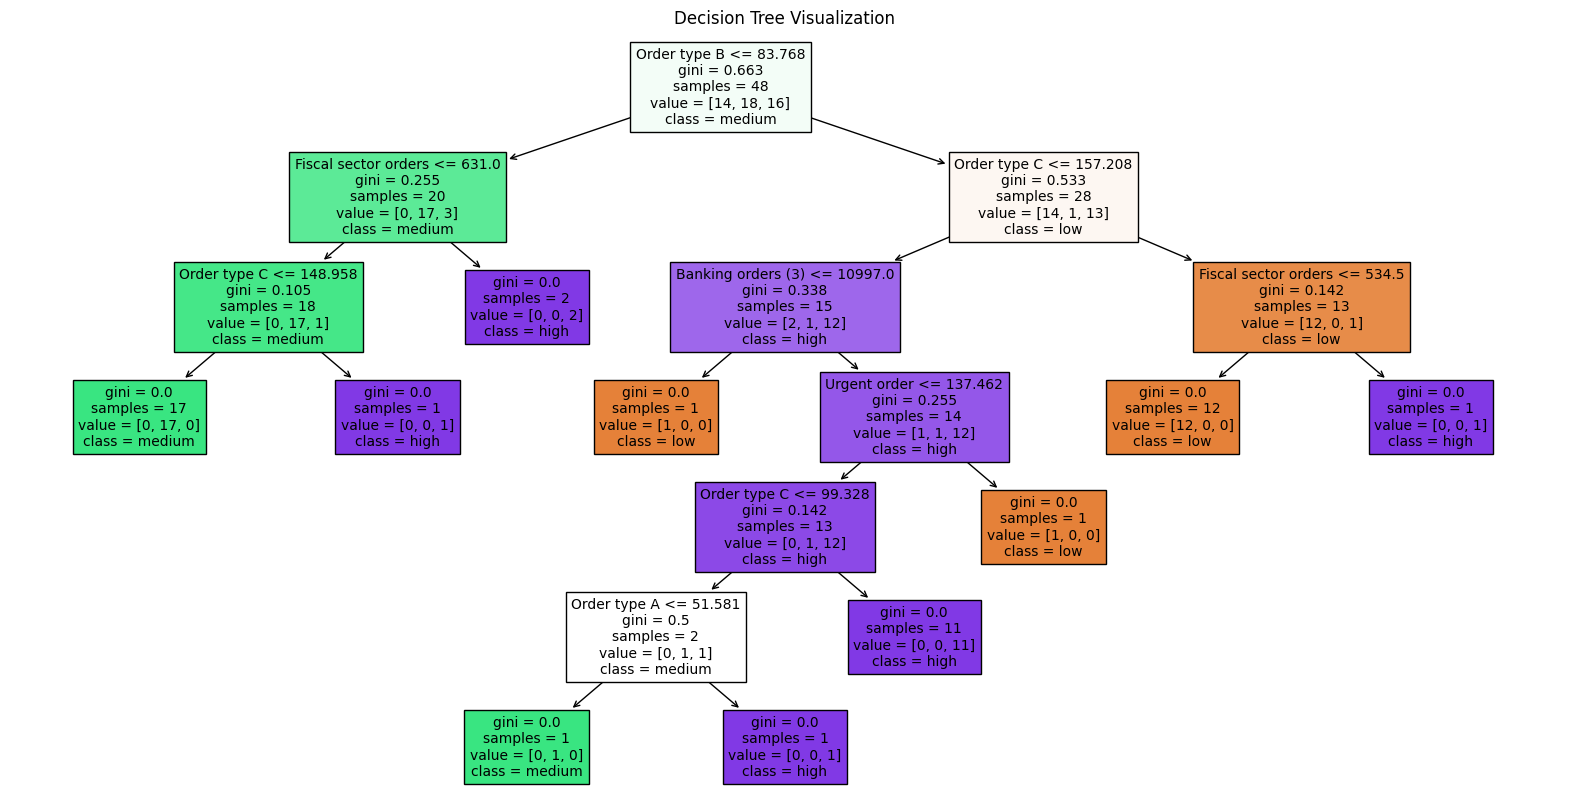

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('Daily_Demand_Forecasting_Orders.csv')

# Feature Engineering: Categorize order volumes
quantiles = df['Total orders'].quantile([0.33, 0.66])
df['Volume_Category'] = pd.cut(df['Total orders'],
                               bins=[-float('inf'), quantiles[0.33], quantiles[0.66], float('inf')],
                               labels=['low', 'medium', 'high'])

# Data Splitting
X = df.drop(['Volume_Category', 'Total orders'], axis=1)  # Features
y = df['Volume_Category']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Model Evaluation
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['low', 'medium', 'high'], fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Grid Search for Decision Tree Fine-Tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_tree_clf = grid_search.best_estimator_

# Train a Gaussian Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Evaluate both models
tree_y_pred = best_tree_clf.predict(X_test)
nb_y_pred = nb_clf.predict(X_test)

# Collecting performance results
tree_classification_report = classification_report(y_test, tree_y_pred)
tree_confusion_matrix = confusion_matrix(y_test, tree_y_pred)
nb_classification_report = classification_report(y_test, nb_y_pred)
nb_confusion_matrix = confusion_matrix(y_test, nb_y_pred)

(tree_classification_report, tree_confusion_matrix, nb_classification_report, nb_confusion_matrix)

('              precision    recall  f1-score   support\n\n        high       0.78      1.00      0.88         7\n         low       1.00      1.00      1.00         2\n      medium       1.00      0.33      0.50         3\n\n    accuracy                           0.83        12\n   macro avg       0.93      0.78      0.79        12\nweighted avg       0.87      0.83      0.80        12\n',
 array([[7, 0, 0],
        [0, 2, 0],
        [2, 0, 1]]),
 '              precision    recall  f1-score   support\n\n        high       1.00      1.00      1.00         7\n         low       1.00      1.00      1.00         2\n      medium       1.00      1.00      1.00         3\n\n    accuracy                           1.00        12\n   macro avg       1.00      1.00      1.00        12\nweighted avg       1.00      1.00      1.00        12\n',
 array([[7, 0, 0],
        [0, 2, 0],
        [0, 0, 3]]))

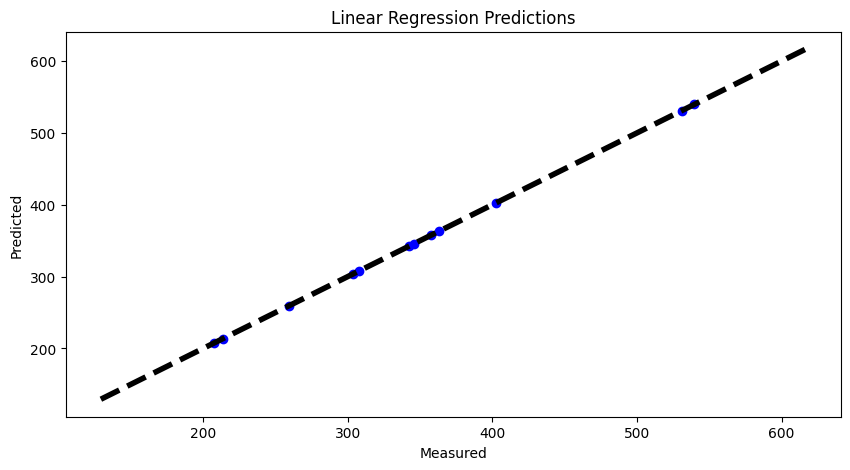

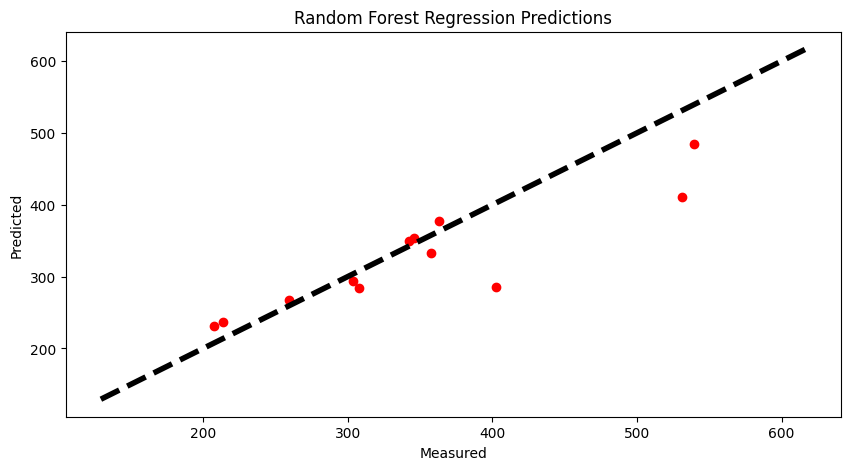

Linear Regression - Mean Squared Error: 4.39789744297806e-24
Linear Regression - R^2 Score: 1.0
Random Forest Regression - Mean Squared Error: 2822.8868159485264
Random Forest Regression - R^2 Score: 0.7242033713460265


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables to numerical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Assuming 'Total orders' is the target and other columns are features. Adjust if needed.
X = df_encoded.drop(['Total orders'], axis=1)  # Replace 'Total orders' with the exact target column name
y = df_encoded['Total orders']  # Replace 'Total orders' with the exact target column name

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Linear Regression Model Evaluation
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Random Forest Regression Model Training
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Random Forest Regression Model Evaluation
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Plotting the results for Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lin, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions')
plt.show()

# Plotting the results for Random Forest Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Predictions')
plt.show()

# Output the performance metrics
print("Linear Regression - Mean Squared Error:", mse_lin)
print("Linear Regression - R^2 Score:", r2_lin)
print("Random Forest Regression - Mean Squared Error:", mse_rf)
print("Random Forest Regression - R^2 Score:", r2_rf)

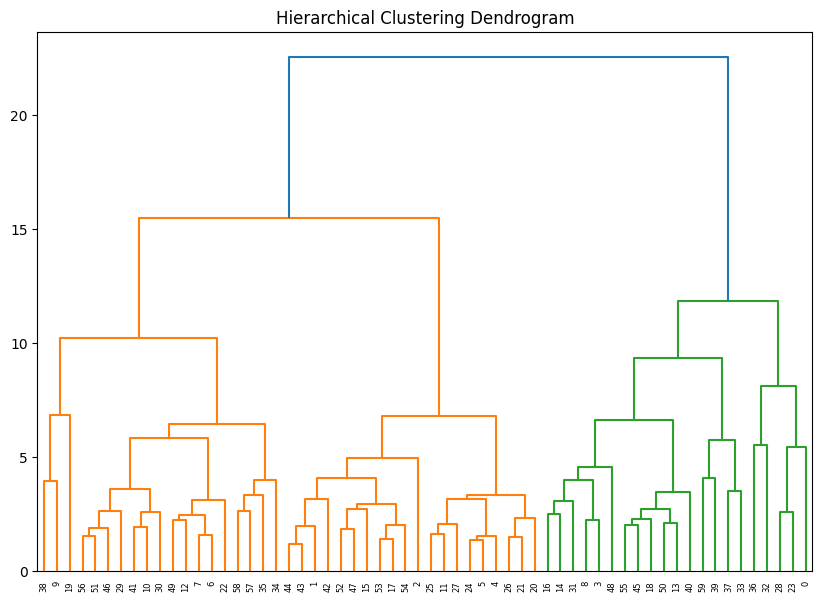

K-means Clustering Results:
kmeans_cluster
0    22
1    20
2    18
Name: count, dtype: int64
                Week of the month (first week, second, third, fourth or fifth week  \
kmeans_cluster                                                                       
0                                                        3.272727                    
1                                                        2.400000                    
2                                                        3.388889                    

                Day of the week (Monday to Friday)  Non-urgent order  \
kmeans_cluster                                                         
0                                         4.454545        161.996000   
1                                         4.700000        117.389650   
2                                         2.777778        246.755056   

                Urgent order  Order type A  Order type B  Order type C  \
kmeans_cluster                           

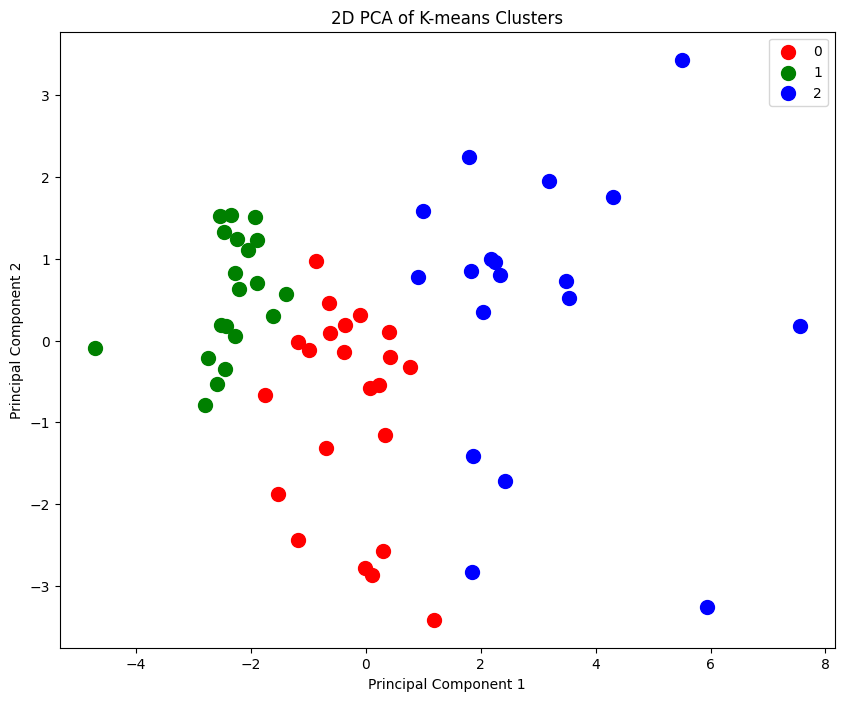

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df)

# Select features for clustering (you might exclude non-relevant or target columns if necessary)
X = df_encoded.drop(['Total orders'], axis=1)  # Adjust if other columns need exclusion

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df_encoded['kmeans_cluster'] = kmeans.labels_

# Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df_encoded.index, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Analyze cluster centroids and counts
print("K-means Clustering Results:")
print(df_encoded['kmeans_cluster'].value_counts())
print(df_encoded.groupby('kmeans_cluster').mean())

# Plotting clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
principal_df['kmeans_cluster'] = df_encoded['kmeans_cluster']

plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']
for color, label in zip(colors, [0, 1, 2]):
    subset = principal_df[principal_df['kmeans_cluster'] == label]
    plt.scatter(subset['principal component 1'], subset['principal component 2'], s=100, c=color, label=str(label))
plt.title('2D PCA of K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

print("Cluster centers:", kmeans.cluster_centers_)

Cluster centers: [[-2.66780392  8.93576069]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]]
